In [1]:
import importlib
import tensorflow as tf
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline


from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3

from base import EnsembleNetwork
from networks import DropoutNetwork, NlpdNetwork, LrNetwork

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Linear

In [2]:
num_meta_epochs = 3#100#100#10
num_epochs = 10#15#0#50#15#5#25#50
seed = 50#42#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}

learning_rate = None#1/num_epochs
num_neurons = [10, 10, 10]
num_neurons_nonlinear = [10,10,10,10,5]
activations = [tf.nn.leaky_relu]*len(num_neurons)
activations_nonlinear = [tf.nn.leaky_relu]*len(num_neurons_nonlinear)

model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,'learning_rate':learning_rate,'l2':True}#{'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}



experiment started at 2018-08-12 09:43:12.760755
initialising Network
experiment number 1 took 16.455833196640015 seconds. That means the whole run will probably take 49.367499589920044 more seconds and 0.8227916598320008 more minutes.
initialising Network
initialising Network
overall, it took 54.57221293449402 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.435261  0.794444  0.901330  0.015562
std    0.284941  0.050918  0.018148  0.004690
min    0.134893  0.750000  0.890224  0.010349
25%    0.302019  0.766667  0.890858  0.013624
50%    0.469145  0.783333  0.891492  0.016899
75%    0.585445  0.816667  0.906882  0.018169
max    0.701745  0.850000  0.922273  0.019439
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.435261 &  0.794444 &  0.901330 &  0.015562 \\
std   &  0.284941 &  0.050918 &  0.01

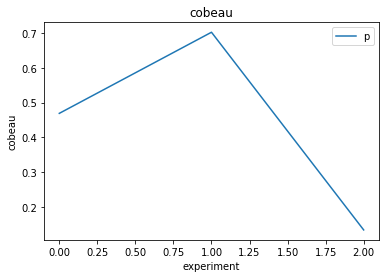

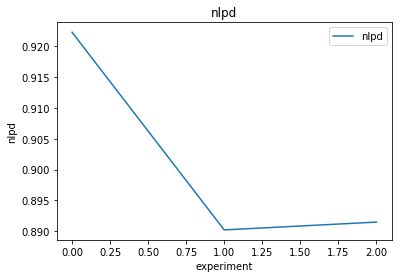

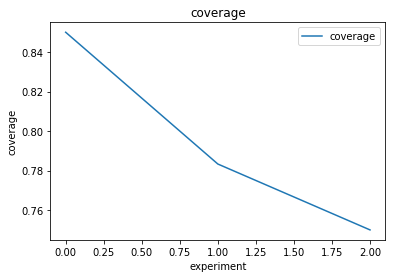

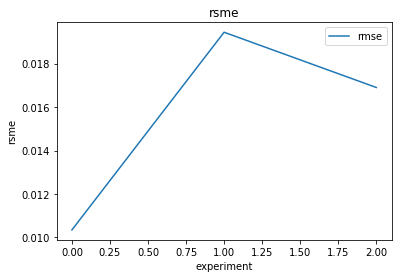

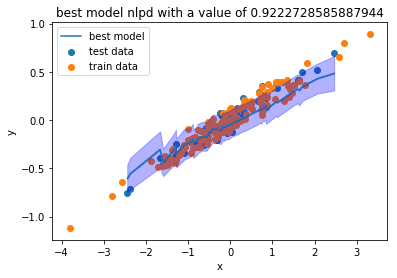

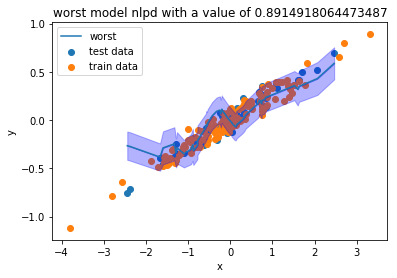

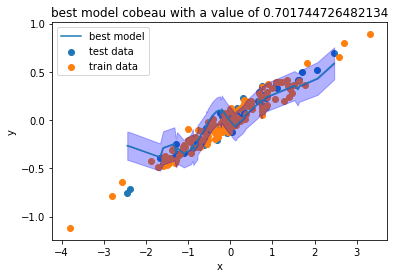

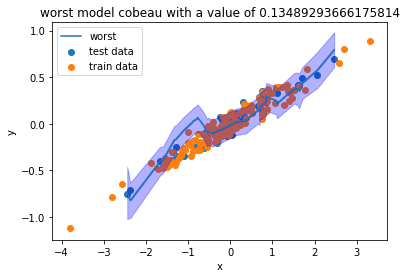

In [3]:
pd = repeat_experiment(DropoutNetwork, dataset_creation.LinearDataset,
                       num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-12 09:44:21.259031
experiment number 1 took 24.643223762512207 seconds. That means the whole run will probably take 73.92967128753662 more seconds and 1.2321611881256103 more minutes.
overall, it took 68.28410220146179 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.263485  0.066667  1.862758  0.008529
std    0.123283  0.033333  0.238976  0.003853
min    0.121791  0.033333  1.621420  0.004693
25%    0.222131  0.050000  1.744488  0.006593
50%    0.322471  0.066667  1.867555  0.008493
75%    0.334332  0.083333  1.983427  0.010446
max    0.346194  0.100000  2.099300  0.012400
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.263485 &  0.066667 &  1.862758 &  0.008529 \\
std   &  0.123283 &  0.033333 &  0.238976 &  0.003853 \\
min   &  0.121791 &  0.033333 &  1.621420 & 

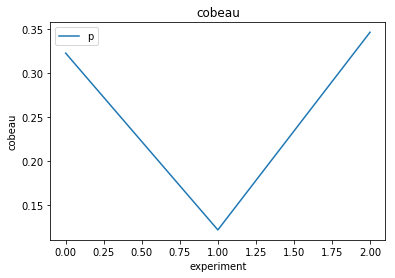

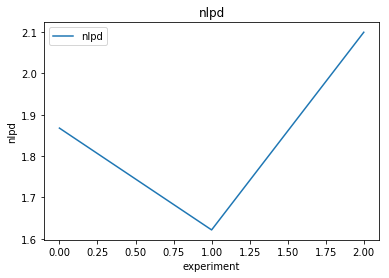

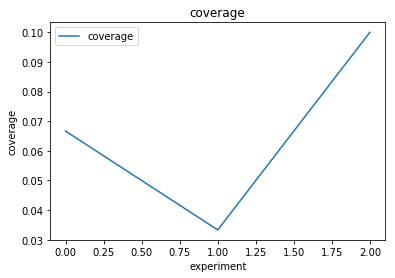

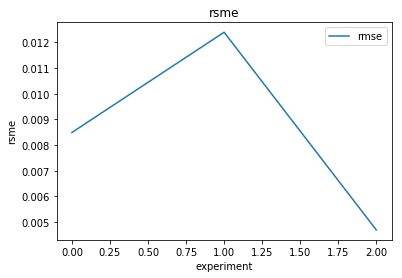

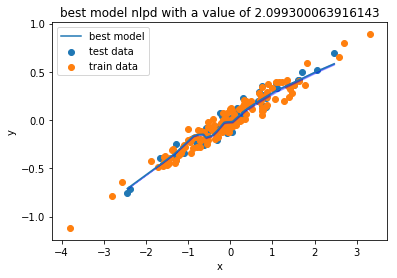

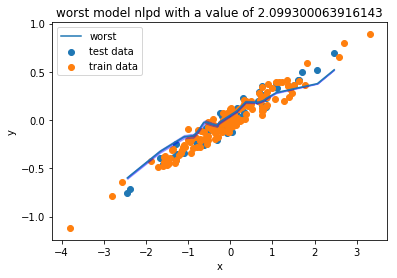

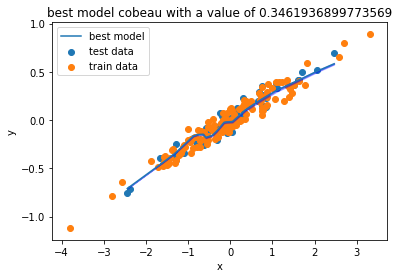

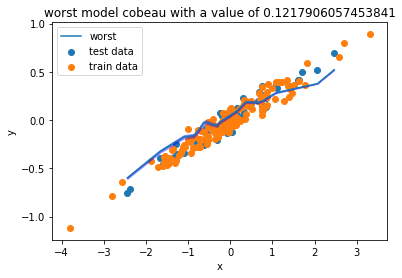

In [4]:
pd1 = repeat_experiment(NlpdNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-12 09:45:43.896437
experiment number 1 took 22.792731761932373 seconds. That means the whole run will probably take 68.37819528579712 more seconds and 1.1396365880966186 more minutes.
overall, it took 68.22151803970337 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.124344  0.088889  1.875866  0.006037
std    0.089984  0.025459  0.173016  0.001585
min    0.042519  0.066667  1.737522  0.004925
25%    0.076158  0.075000  1.778869  0.005130
50%    0.109798  0.083333  1.820217  0.005335
75%    0.165256  0.100000  1.945038  0.006593
max    0.220715  0.116667  2.069859  0.007852
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.124344 &  0.088889 &  1.875866 &  0.006037 \\
std   &  0.089984 &  0.025459 &  0.173016 &  0.001585 \\
min   &  0.042519 &  0.066667 &  1.737522 & 

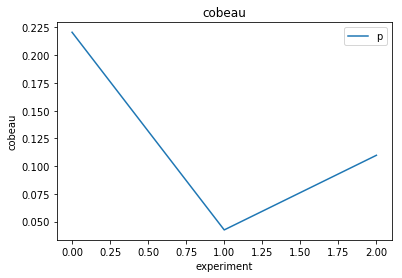

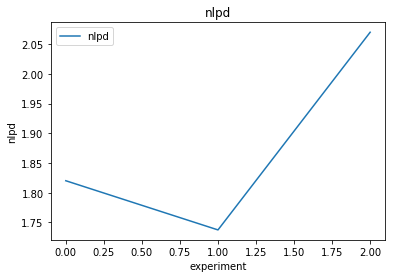

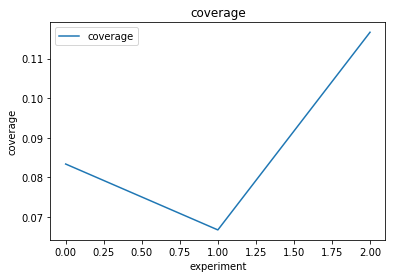

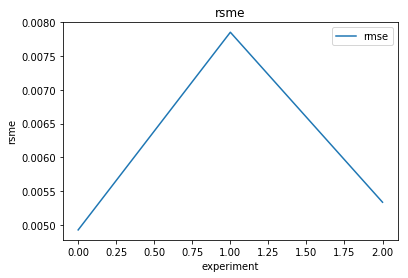

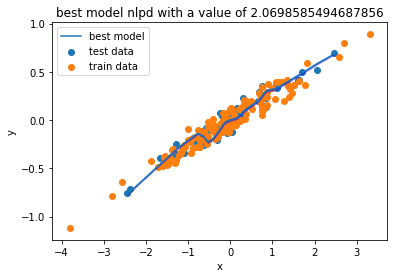

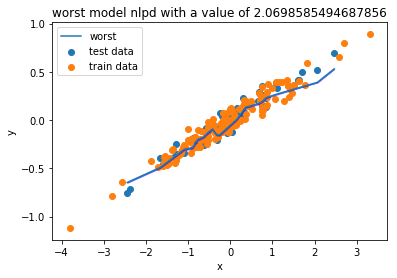

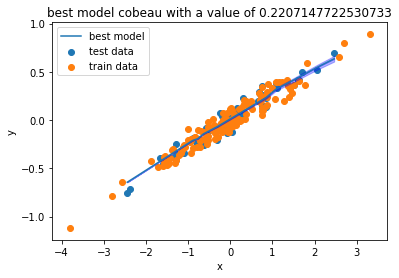

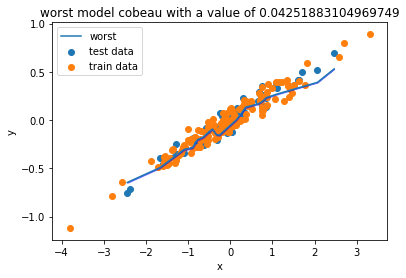

In [5]:
pd2 = repeat_experiment(LrNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 5#10
#num_epochs = 10#15#50 #10
seed = 42+42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}#[5,5,5]}#

dataset_params = {'num_samples':num_samples,'seed':seed}

learning_rate = None#1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,
                'activations':activations_nonlinear,
                'l2':True
               }#{'num_epochs':num_epochs,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-12 09:47:06.645769
initialising Network
experiment number 1 took 19.048598051071167 seconds. That means the whole run will probably take 57.1457941532135 more seconds and 0.9524299025535583 more minutes.
initialising Network
initialising Network
overall, it took 55.35548400878906 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.170044  0.200000  0.081754  0.256466
std    0.127685  0.044096  0.266449  0.073776
min    0.023861  0.150000 -0.194471  0.185675
25%    0.125189  0.183333 -0.045976  0.218248
50%    0.226517  0.216667  0.102519  0.250822
75%    0.243136  0.225000  0.219866  0.291862
max    0.259755  0.233333  0.337213  0.332903
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.170044 &  0.200000 &  0.081754 &  0.256466 \\
std   &  0.127685 &  0.044096 &  0.2664

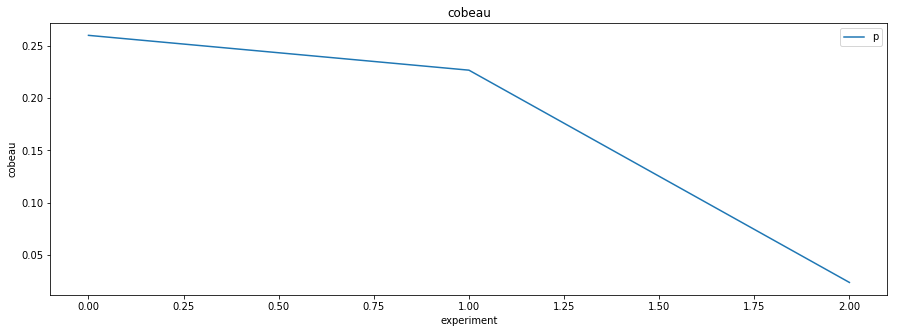

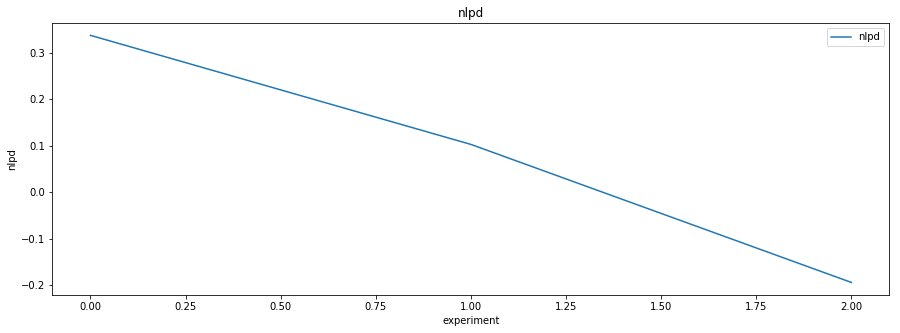

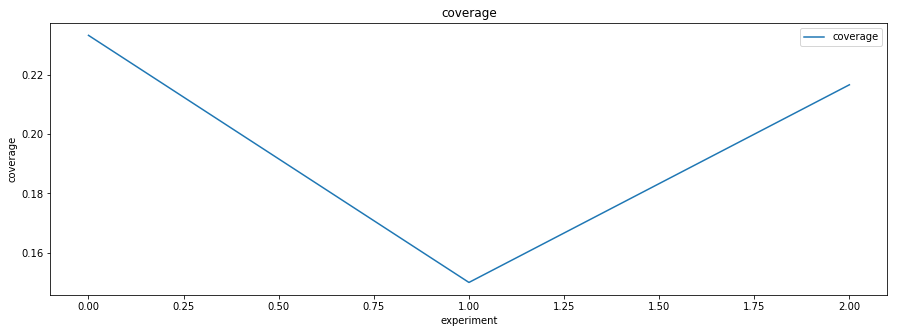

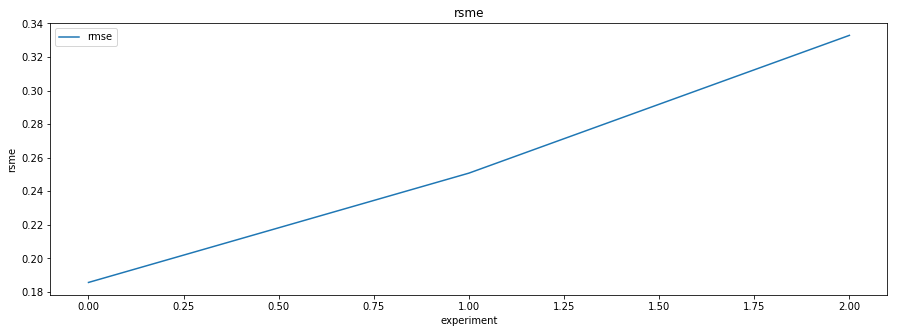

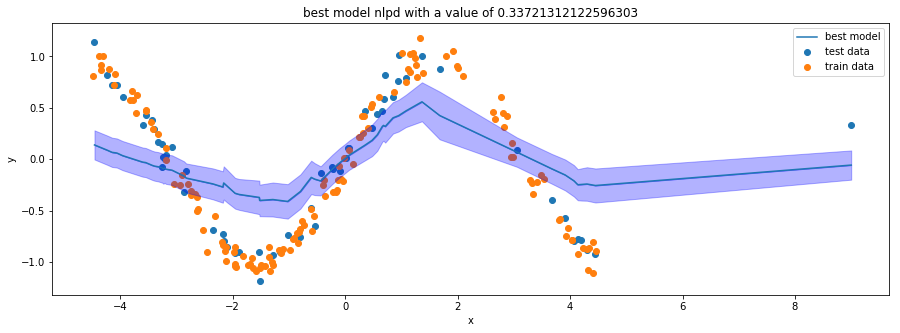

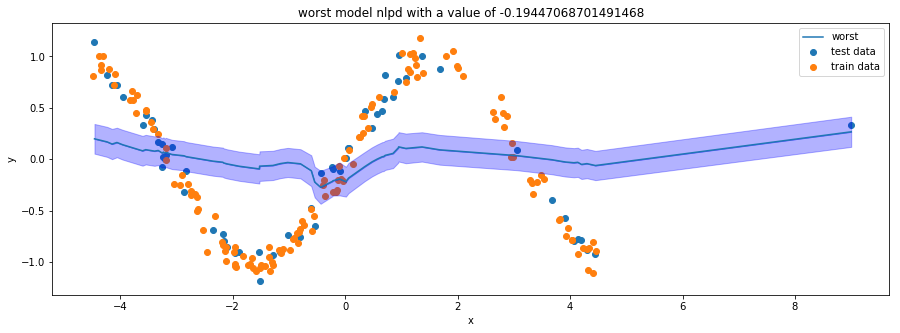

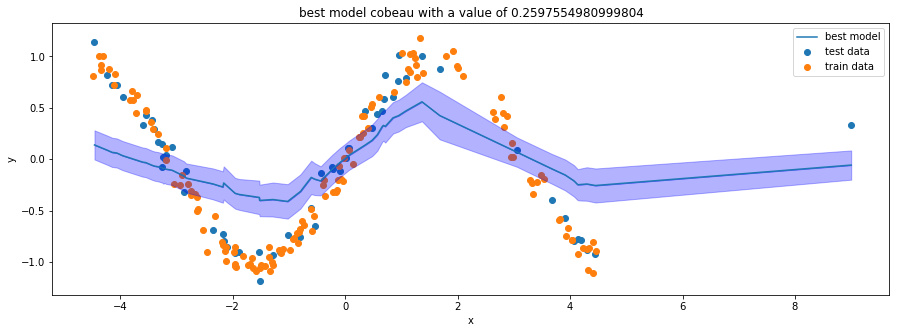

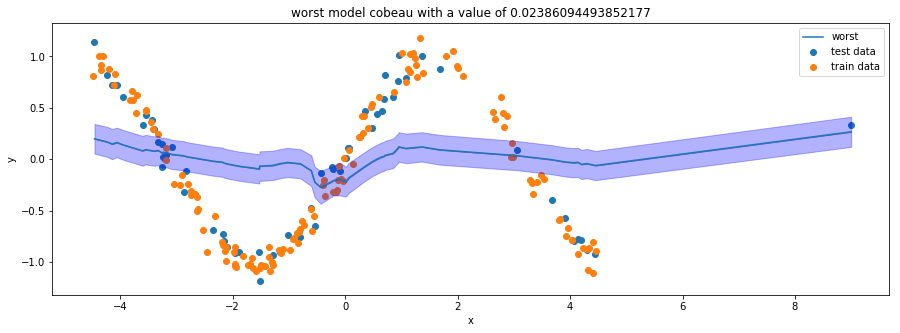

In [7]:
pd11 = repeat_experiment(DropoutNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-12 09:48:18.068574
experiment number 1 took 28.23168396949768 seconds. That means the whole run will probably take 84.69505190849304 more seconds and 1.411584198474884 more minutes.
overall, it took 86.52401089668274 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   9.580792e-02  0.444444 -0.053685  0.476363
std    1.041884e-01  0.212350  0.452016  0.474025
min    1.700671e-27  0.200000 -0.458789  0.135349
25%    4.034859e-02  0.375000 -0.297472  0.205717
50%    8.069718e-02  0.550000 -0.136155  0.276084
75%    1.437119e-01  0.566667  0.148866  0.646870
max    2.067266e-01  0.583333  0.433888  1.017656
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  9.580792e-02 &  0.444444 & -0.053685 &  0.476363 \\
std   &  1.041884e-01 &  0.212350 &  0.452016 &  0.4740

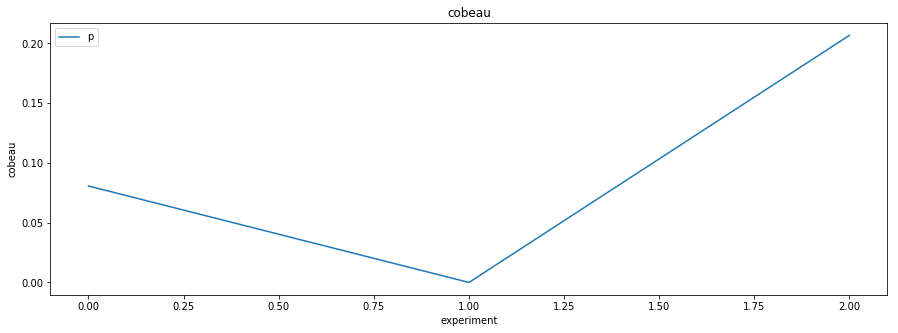

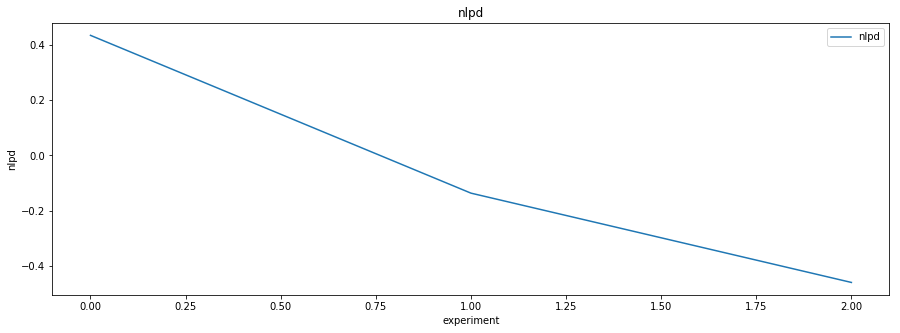

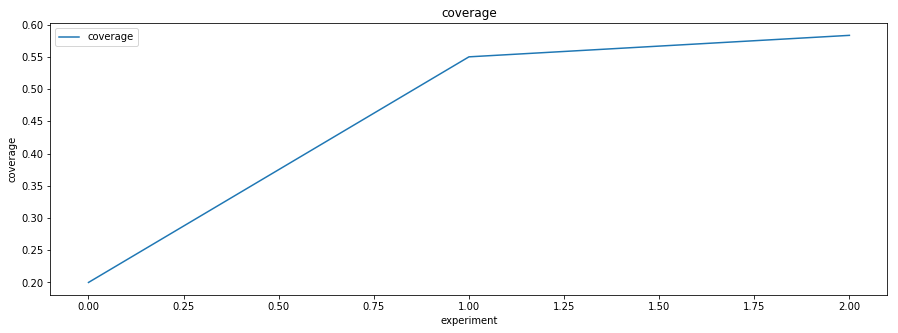

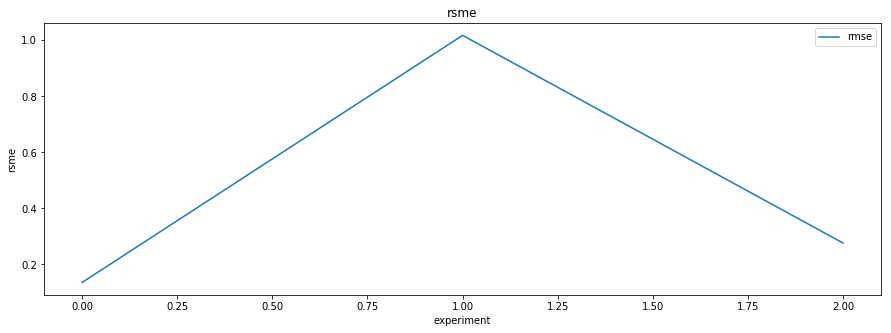

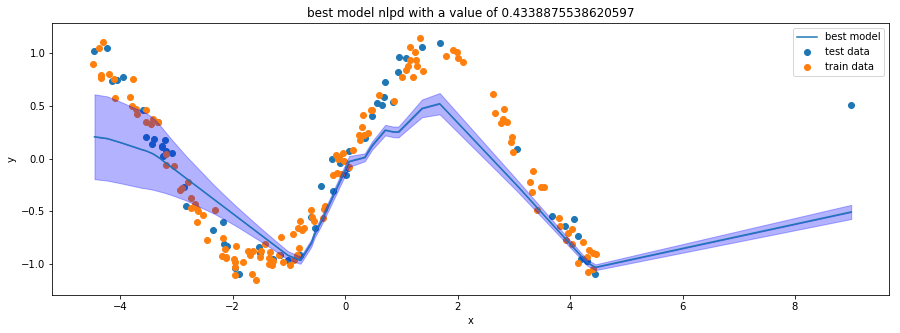

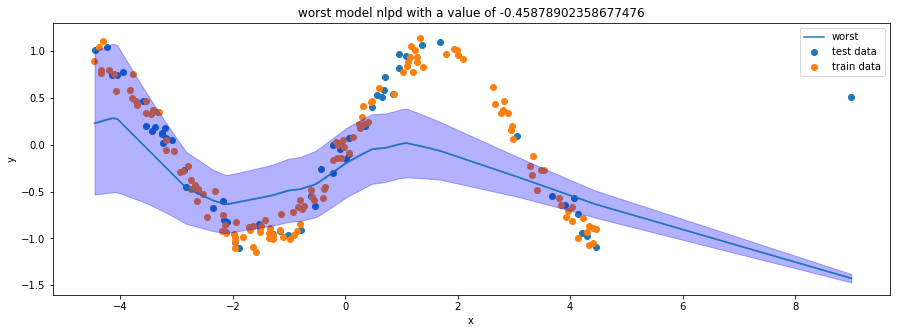

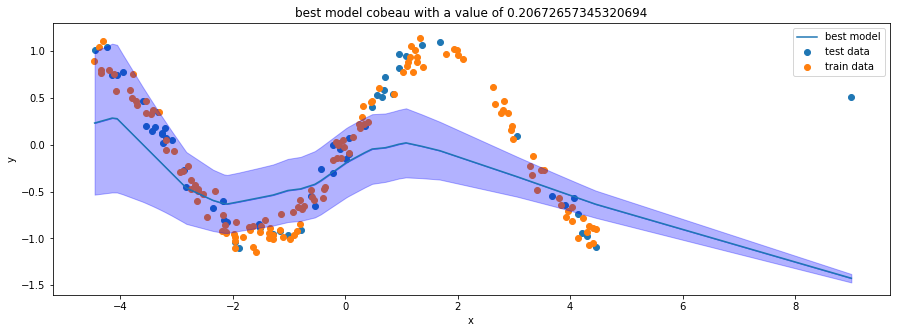

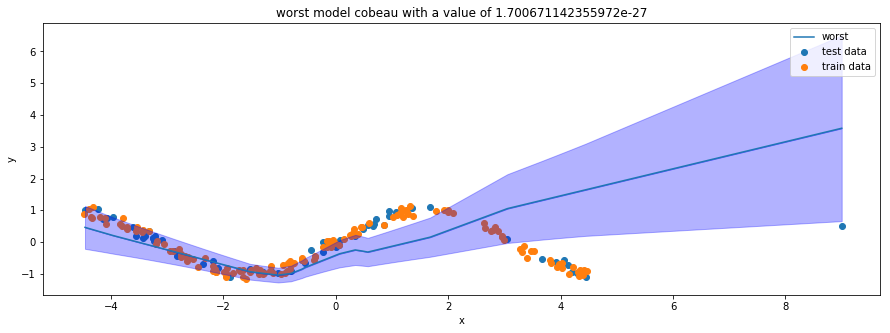

In [8]:
pd22 = repeat_experiment(NlpdNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-12 09:49:59.975532
experiment number 1 took 16.660062789916992 seconds. That means the whole run will probably take 49.98018836975098 more seconds and 0.8330031394958496 more minutes.
overall, it took 60.83308696746826 seconds with 3 experiments
         cobeau  coverage       nlpd      rsme
count  3.000000  3.000000   3.000000  3.000000
mean   0.159889  0.355556  -4.275887  0.187908
std    0.191396  0.041944   8.092081  0.080311
min    0.015461  0.316667 -13.614651  0.102770
25%    0.051346  0.333333  -6.745098  0.150707
50%    0.087231  0.350000   0.124455  0.198644
75%    0.232103  0.375000   0.393495  0.230478
max    0.376975  0.400000   0.662536  0.262311
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &       nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &   3.000000 &  3.000000 \\
mean  &  0.159889 &  0.355556 &  -4.275887 &  0.187908 \\
std   &  0.191396 &  0.041944 &   8.092081 &  0.080311 \\
min   &  0.015461 &  0.316667 &

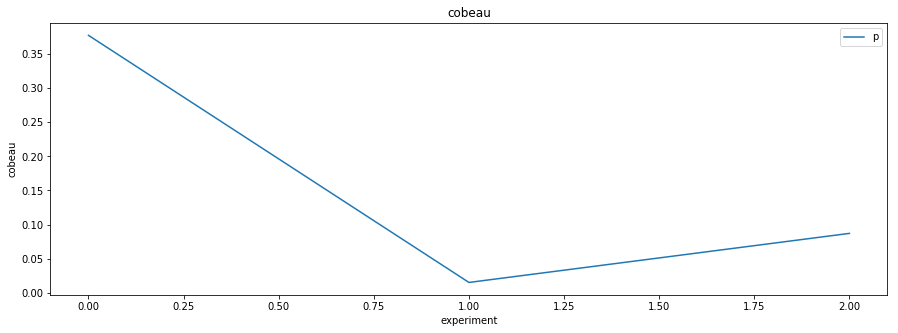

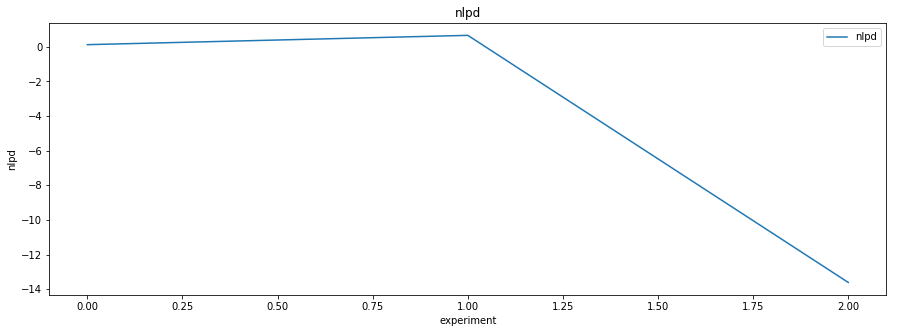

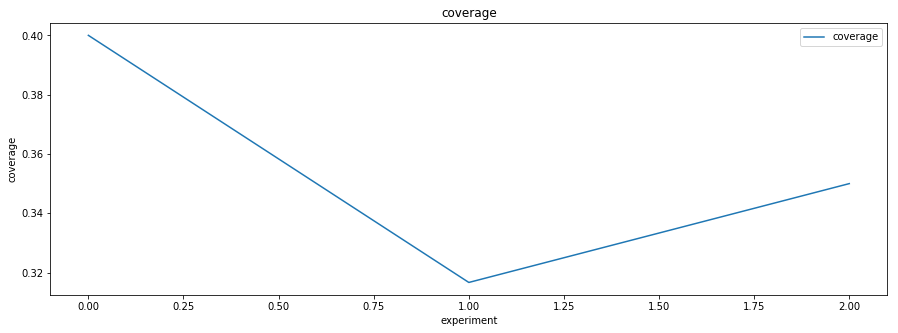

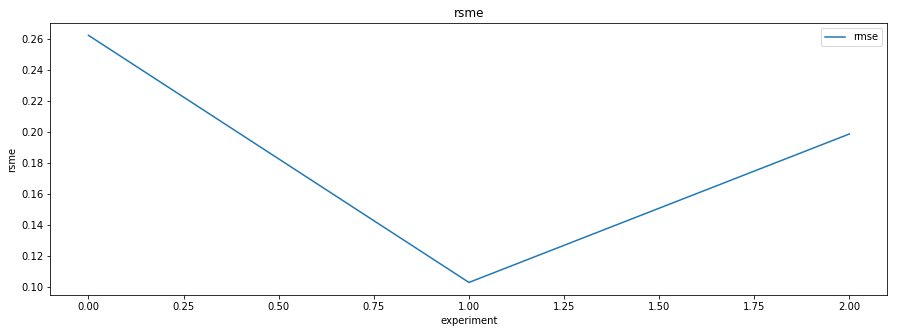

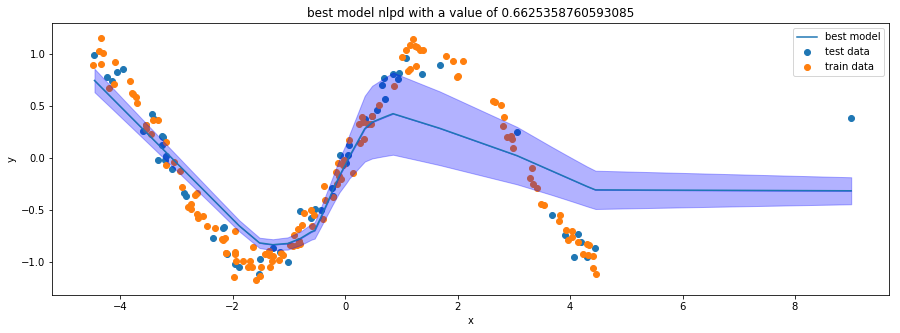

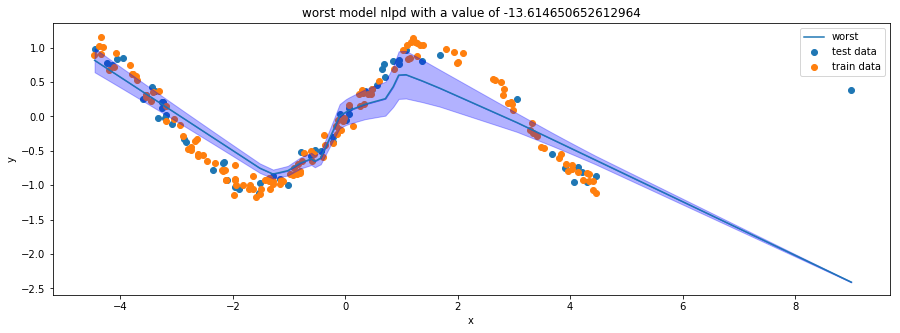

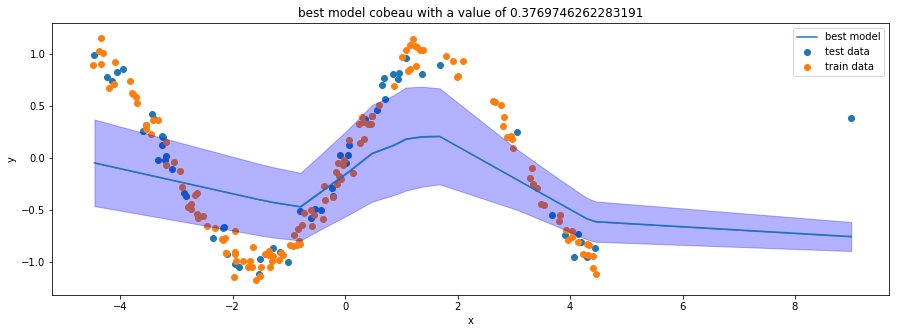

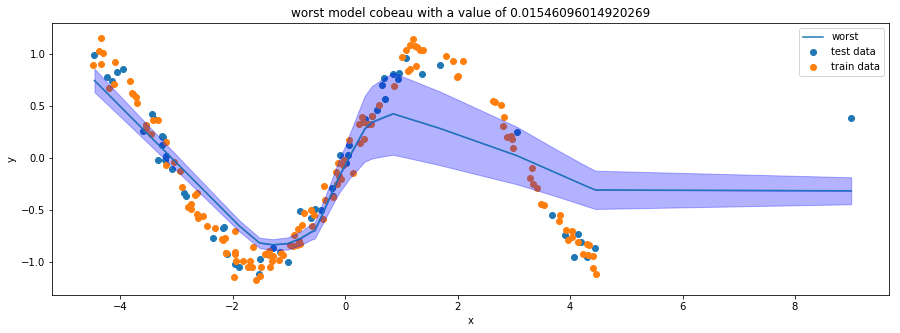

In [9]:
pd33 = repeat_experiment(LrNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# X3

In [10]:
importlib.reload(dataset_creation)

dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-12 09:51:16.098523
initialising Network
experiment number 1 took 19.344340085983276 seconds. That means the whole run will probably take 58.03302025794983 more seconds and 0.9672170042991638 more minutes.
initialising Network
initialising Network
overall, it took 53.70834684371948 seconds with 3 experiments
             cobeau  coverage        nlpd        rsme
count  3.000000e+00  3.000000    3.000000    3.000000
mean   2.902422e-04  0.796610 -124.630184  270.001313
std    3.741655e-04  0.033898   58.226858   32.058998
min    9.603177e-10  0.762712 -178.788871  232.987014
25%    7.909997e-05  0.779661 -155.421627  260.505063
50%    1.581990e-04  0.796610 -132.054382  288.023113
75%    4.353629e-04  0.813559  -97.550840  288.508463
max    7.125267e-04  0.830508  -63.047298  288.993813
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &        nlpd &        rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &    3.000000 &    3.000000 \\
mean  &

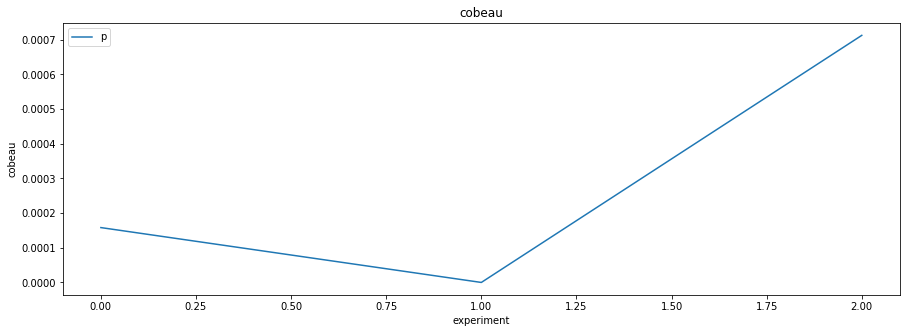

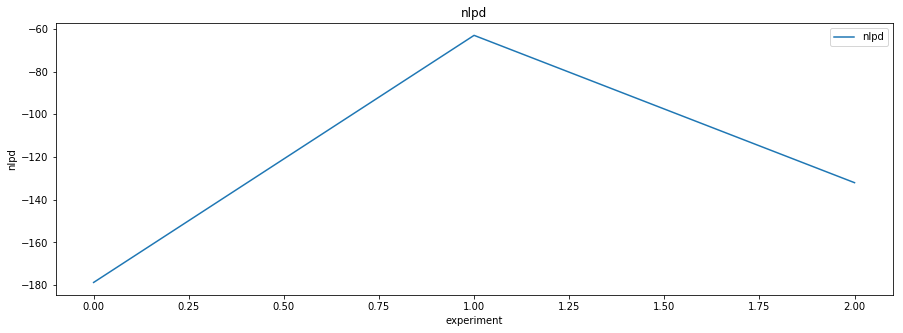

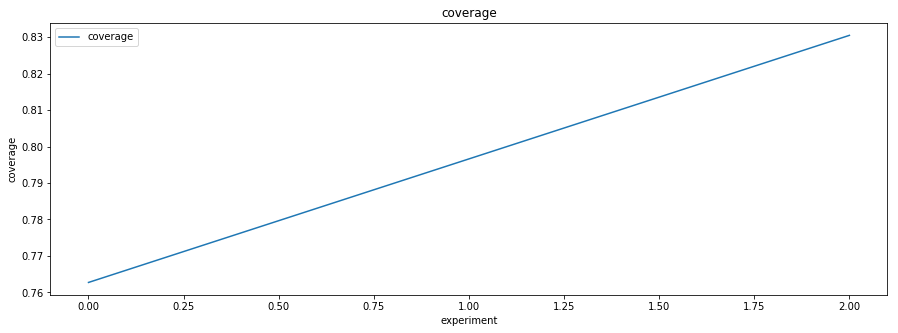

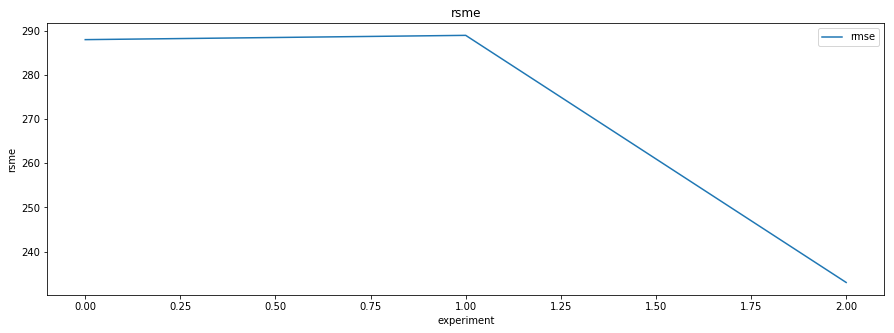

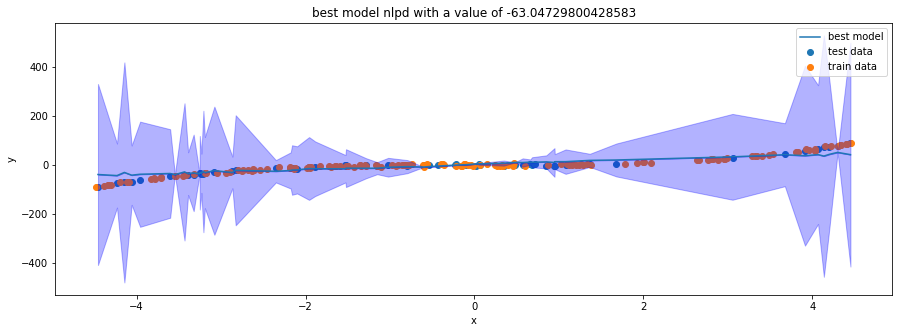

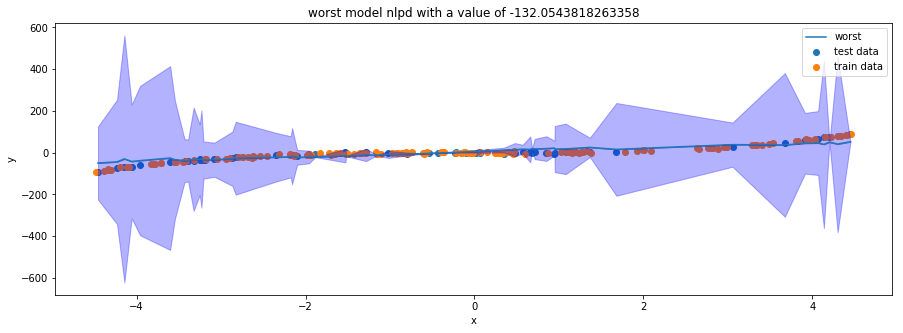

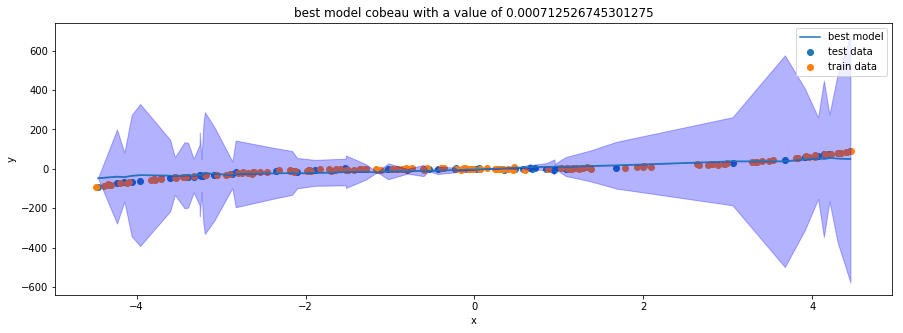

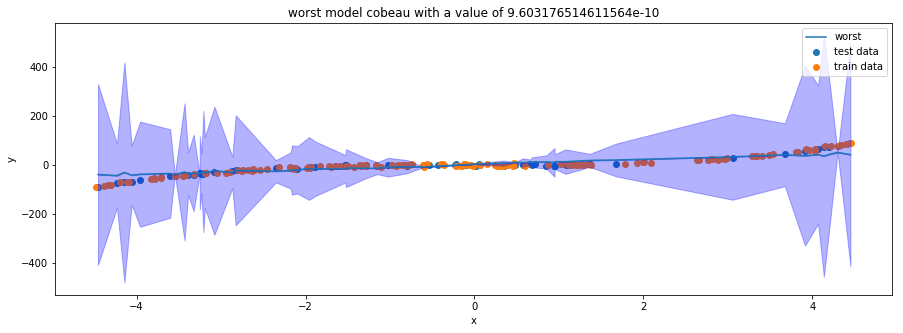

In [11]:


pd111 = repeat_experiment(DropoutNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,
                          model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-12 09:52:25.759292
experiment number 1 took 29.89380693435669 seconds. That means the whole run will probably take 89.68142080307007 more seconds and 1.4946903467178345 more minutes.
overall, it took 84.59289979934692 seconds with 3 experiments
             cobeau  coverage           nlpd         rsme
count  3.000000e+00  3.000000       3.000000     3.000000
mean   1.386722e-03  0.581921 -245881.599441   833.287930
std    2.401848e-03  0.395803  425850.880889   358.785569
min    3.788336e-11  0.152542 -737611.840834   502.188901
25%    1.423018e-08  0.406780 -368816.817363   642.685580
50%    2.842247e-08  0.661017     -21.793892   783.182258
75%    2.080083e-03  0.796610     -16.478744   998.837444
max    4.160138e-03  0.932203     -11.163595  1214.492631
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &           nlpd &         rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &       3.000000 &     3.000000 \\
mean  &  1.386722e-03 &  0.

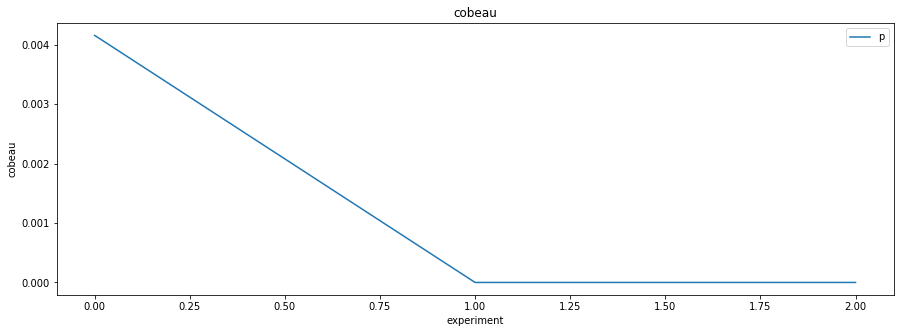

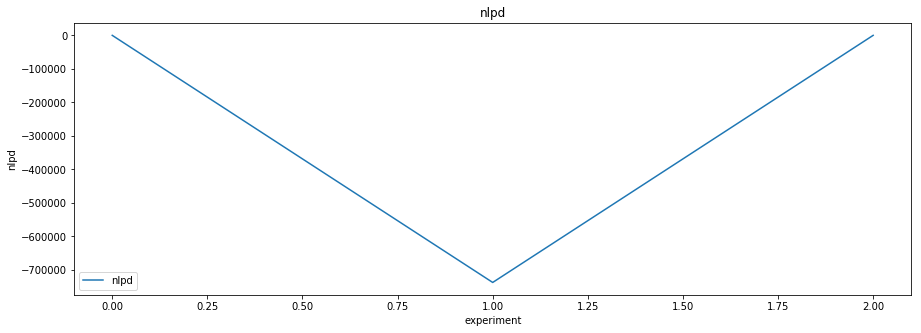

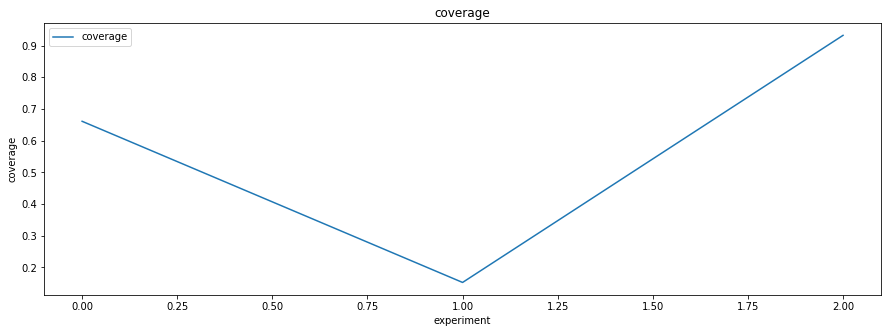

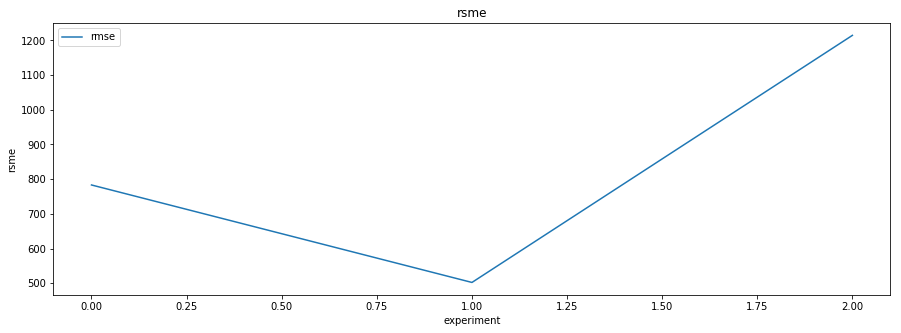

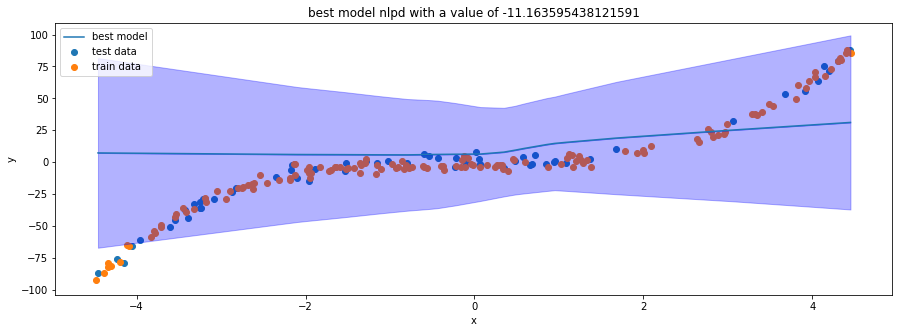

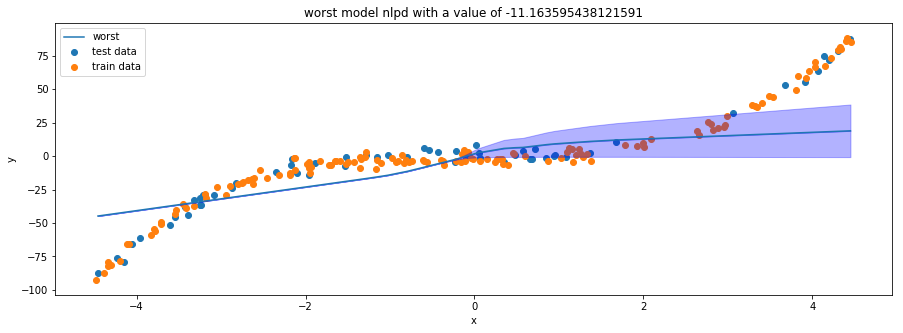

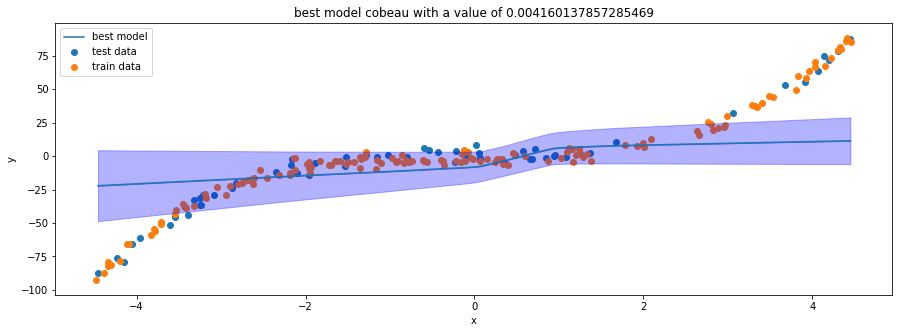

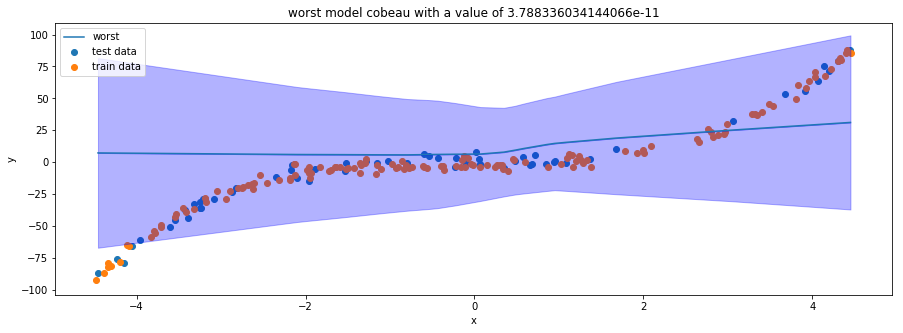

In [12]:
pd222 = repeat_experiment(NlpdNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-12 09:54:04.695142
experiment number 1 took 16.209759950637817 seconds. That means the whole run will probably take 48.62927985191345 more seconds and 0.8104879975318908 more minutes.
overall, it took 51.5125949382782 seconds with 3 experiments
             cobeau  coverage      nlpd        rsme
count  3.000000e+00  3.000000  3.000000    3.000000
mean   2.438391e-05  0.983051 -4.019037  212.319166
std    4.150026e-05  0.029357  2.021493  122.710135
min    2.494781e-07  0.949153 -6.352620  122.578772
25%    4.239376e-07  0.974576 -4.626018  142.403089
50%    5.983971e-07  1.000000 -2.899416  162.227405
75%    3.645113e-05  1.000000 -2.852245  257.189363
max    7.230387e-05  1.000000 -2.805075  352.151321
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &        rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &    3.000000 \\
mean  &  2.438391e-05 &  0.983051 & -4.019037 &  212.319166 \\
std   &  4.150026e-05 &  0.029

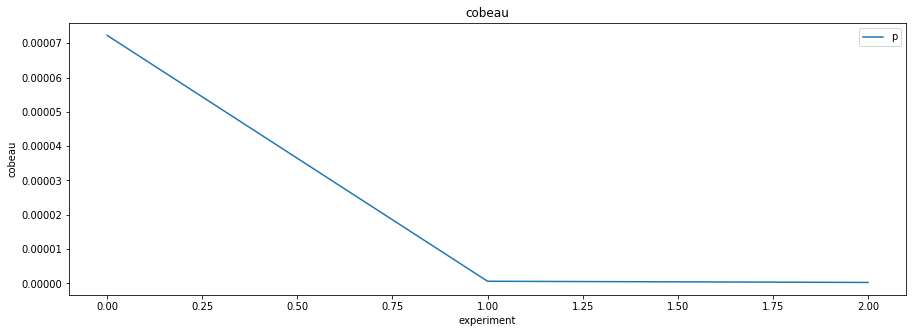

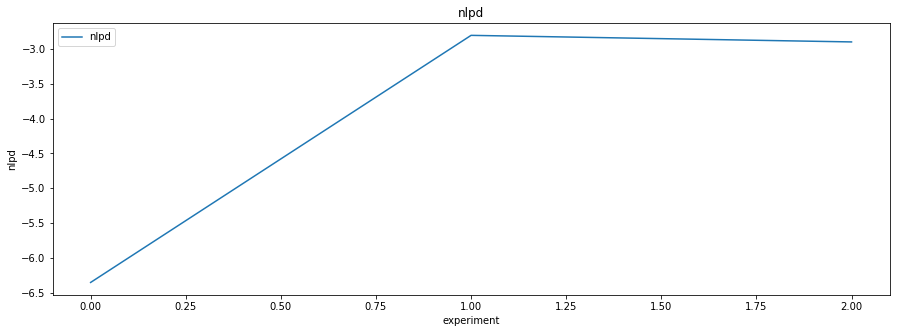

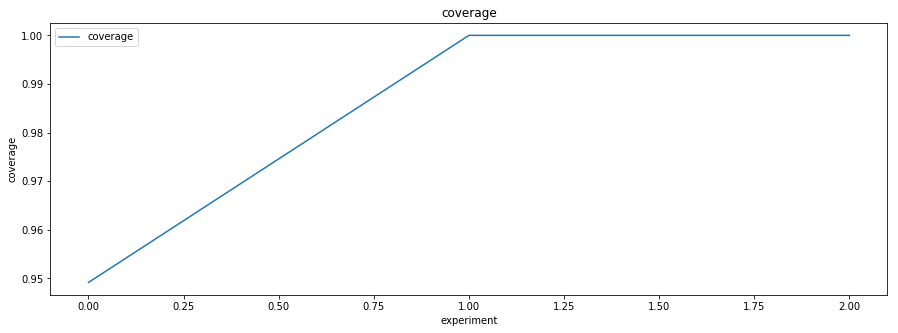

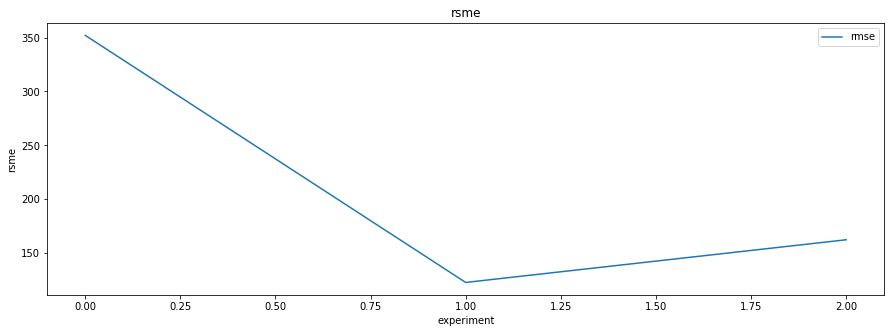

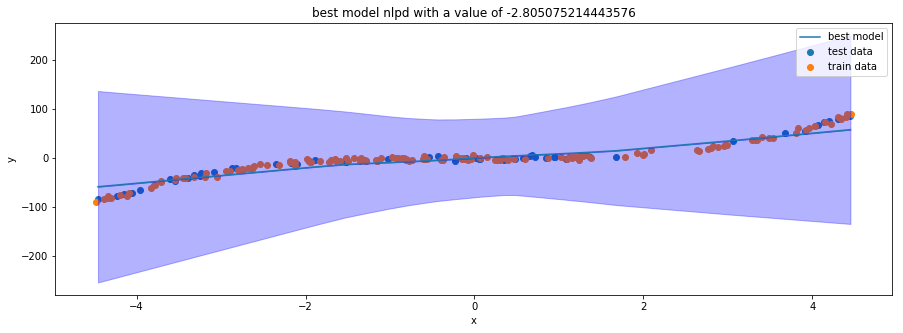

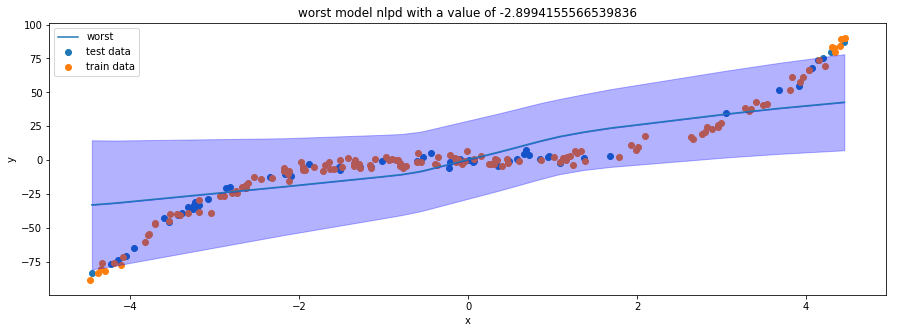

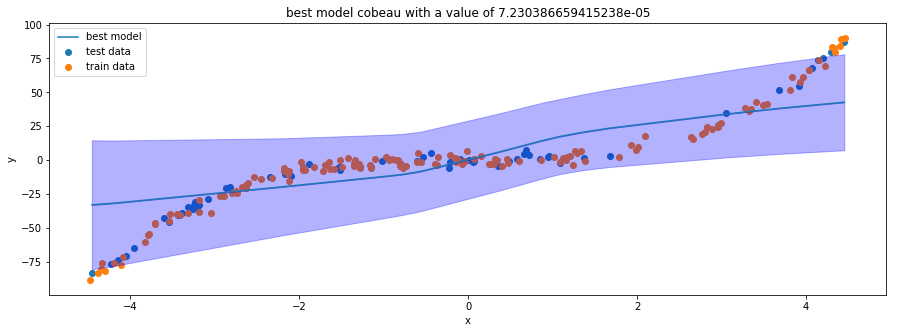

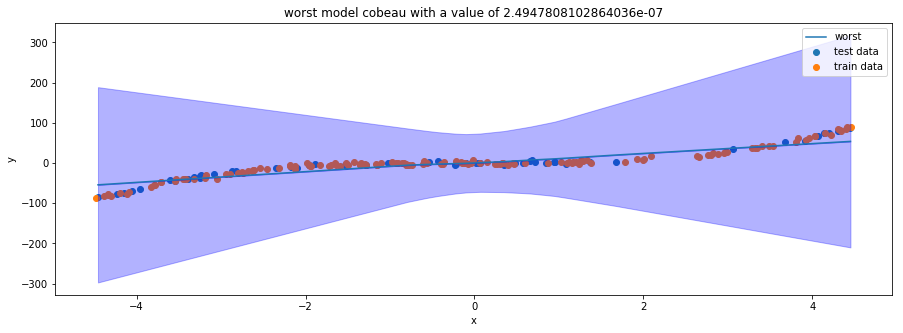

In [13]:
pd333 = repeat_experiment(LrNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)